In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
compAP = pd.read_csv('/Users/michaelperrine/Library/CloudStorage/OneDrive-Personal/Documents/Bellevue/Data Visualization/Week 9-10/complaints-by-airport.csv')

In [15]:
compAP.head()

,pdf_report_date,airport,year_month,count
0,2019-02,ABE,2015-01,0
1,2019-02,ABE,2015-02,0
2,2019-02,ABE,2015-03,0
3,2019-02,ABE,2015-04,0
4,2019-02,ABE,2015-05,2


In [16]:
compCat = pd.read_csv('/Users/michaelperrine/Library/CloudStorage/OneDrive-Personal/Documents/Bellevue/Data Visualization/Week 9-10/complaints-by-category.csv')

In [17]:
compCat.head()

,pdf_report_date,airport,category,year_month,count,clean_cat,clean_cat_status
0,2019-02,ABE,Hazardous Materials Safety,2015-01,0,Hazardous Materials Safety,original
1,2019-02,ABE,Mishandling of Passenger Property,2015-01,0,Mishandling of Passenger Property,original
2,2019-02,ABE,Hazardous Materials Safety,2015-02,0,Hazardous Materials Safety,original
3,2019-02,ABE,Mishandling of Passenger Property,2015-02,0,Mishandling of Passenger Property,original
4,2019-02,ABE,Hazardous Materials Safety,2015-03,0,Hazardous Materials Safety,original


In [18]:
compScat = pd.read_csv('/Users/michaelperrine/Library/CloudStorage/OneDrive-Personal/Documents/Bellevue/Data Visualization/Week 9-10/complaints-by-subcategory.csv')

In [19]:
compScat.head()

,pdf_report_date,airport,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed
0,2019-02,ABE,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False
1,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
2,2019-02,ABE,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False
3,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
4,2019-02,ABE,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False


In [20]:
iata = pd.read_csv('/Users/michaelperrine/Library/CloudStorage/OneDrive-Personal/Documents/Bellevue/Data Visualization/Week 9-10/iata-icao.csv')

In [21]:
iata.head()

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Abu Zaby,AAN,OMAL,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,OMAA,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,NaN,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,OMAM,Al Dhafra Air Base,24.2482,54.5477


In [22]:
print(f'The dimensions of compAP is: {compAP.shape}')
print(f'The dimesions of compCat is: {compCat.shape}')
print(f'The dimesions of compScat is: {compScat.shape}')
print(f'The dimesions of iata is: {iata.shape}')

The dimensions of compAP is: (41721, 4)
The dimesions of compCat is: (241588, 7)
The dimesions of compScat is: (504512, 11)
The dimesions of iata is: (8937, 7)


In [24]:
compAP.columns

Index(['pdf_report_date', 'airport', 'year_month', 'count'], dtype='object')

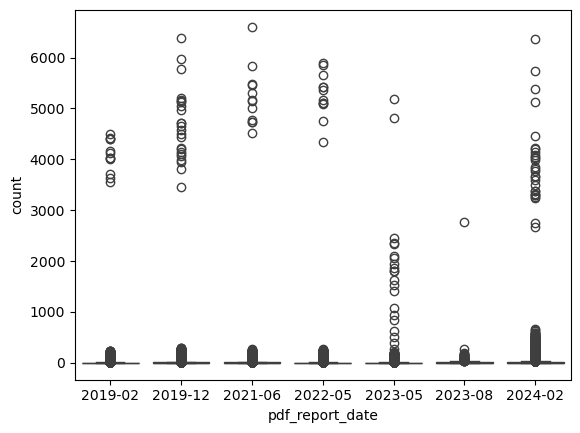

In [25]:
sns.boxplot(data=compAP, x = 'pdf_report_date', y = 'count')
plt.show()

In [30]:
compScat.columns

Index(['pdf_report_date', 'airport', 'category', 'subcategory', 'year_month',
       'count', 'clean_cat', 'clean_subcat', 'clean_cat_status',
       'clean_subcat_status', 'is_category_prefix_removed'],
      dtype='object')